In [11]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Q4

## 1. Generating Data
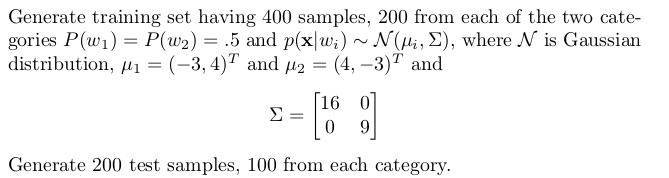

In [12]:
# Defining mean and sigma and using numpy function to sample data.
mean = np.array([[-3, 4],[4,-3]])
sigma = np.array([[16, 0], [0, 9]])

x_train = np.hstack((np.random.multivariate_normal(mean[0], sigma, 200).T, np.random.multivariate_normal(mean[1], sigma, 200).T))
y_train = np.hstack((np.ones(200), -np.ones(200)))

x_test = np.hstack((np.random.multivariate_normal(mean[0], sigma, 100).T, np.random.multivariate_normal(mean[1], sigma, 100).T))
y_test = np.hstack((np.ones(100), - np.ones(100)))

In [13]:
# QUESTION 6:
# PreProcessed Data 
preprocessed_x_train = np.divide((x_train.T - np.mean(x_train, axis=1)), np.array([4,3])).T
preprocessed_x_test = np.divide((x_test.T - np.mean(x_test, axis=1)), np.array([4,3])).T

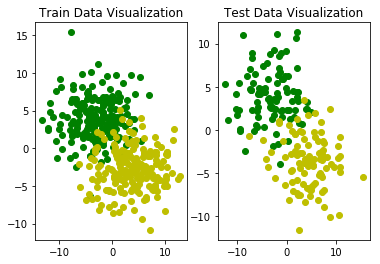

In [14]:
plot = plt.figure()
plot_train = plot.add_subplot(121)
plot_test = plot.add_subplot(122)
plot_train.plot(x_train[0,:200], x_train[1,:200], 'go', x_train[0,200:400], x_train[1,200:400], 'yo')
plot_train.title.set_text('Train Data Visualization')
plot_test.plot(x_test[0,:100], x_test[1,:100], 'go', x_test[0,100:200], x_test[1,100:200], 'yo')
plot_test.title.set_text('Test Data Visualization')
plt.show()

In [15]:
#Functions for prediction, loss, gradients
def y_pred(i, w1, w2, b):
    return (w1*x_train[0,i] + w2*x_train[1,i] + b)
def loss(i):
    return np.square(y_train[i] - y_pred(i, w1, w2, b))

def y_pred_test(i, w1, w2, b):
    return (w1*x_test[0,i] + w2*x_test[1,i] + b)
def loss_test(i):
    return (np.square(y_test[i] - y_pred_test(i, w1, w2, b)))

def dLdw1(i):
     return ((y_train[i]-y_pred(i, w1, w2, b))*x_train[0,i] * -2)
def dLdw2(i):
    return ((y_train[i]-y_pred(i, w1, w2, b))*x_train[1,i] * -2)
def dLdb(i):
    return ((y_train[i]-y_pred(i, w1, w2, b))*-2)

In [16]:
# QUESTION 6: functions for preprocessed data
def preprocessed_y_pred(i, w1, w2, b):
    return (w1*preprocessed_x_train[0,i] + w2*preprocessed_x_train[1,i] + b)
def preprocessed_loss(i):
    return np.square(y_train[i] - preprocessed_y_pred(i, w1, w2, b))

def preprocessed_y_pred_test(i, w1, w2, b):
    return (w1*preprocessed_x_test[0,i] + w2*preprocessed_x_test[1,i] + b)
def preprocessed_loss_test(i):
    return np.square(y_test[i] - preprocessed_y_pred_test(i, w1, w2, b))

def preprocessed_dLdw1(i):
    return (-2 * (y_train[i]-preprocessed_y_pred(i, w1, w2, b))*preprocessed_x_train[0,i])
def preprocessed_dLdw2(i):
    return (-2 * (y_train[i]-preprocessed_y_pred(i, w1, w2, b))*preprocessed_x_train[1,i])
def preprocessed_dLdb(i):
    return (-2 * (y_train[i]-y_pred(i, w1, w2, b)))

In [17]:
# TODO_U: Add batch perceptron image here and please change the names of variables from here (all the blocks below)

## Question 1,2,3

In [18]:
# Algorithm: TODO_U: MODIFY THIS BLOCK
w1 = random.randint(0, 10)
w2 = random.randint(0, 10)
b = random.randint(0, 10) #randomly initializaing weights
alpha1 = 0.00004
tot_dLdw1 = 0
tot_dLdw2 = 0
tot_dLdb = 0
tot_loss = 0
tot_loss_test = 0

gradient_all = np.random.randint(500,1000, size=(3)) # High random values
theta = 50

loss_train_arr = np.array([])
loss_test_arr = np.array([])

ite_number1 = 0

while np.linalg.norm(gradient_all)  > theta:
    tot_dLdw1 = 0; tot_dLdw2 = 0; tot_dLdb = 0; tot_loss = 0; tot_loss_test = 0
    for i in range(x_train.shape[1]):
        tot_dLdw1 += dLdw1(i)
        tot_dLdw2 += dLdw2(i)
        tot_dLdb += dLdb(i)
        tot_loss += loss(i)
    for j in range(x_test.shape[1]):
        tot_loss_test += loss_test(j)
    loss_train_arr = np.append(loss_train_arr, tot_loss)
    loss_test_arr = np.append(loss_test_arr, tot_loss_test)
    gradient_all = np.array([tot_dLdw1, tot_dLdw2, tot_dLdb])
    w1 = w1 - (alpha1*tot_dLdw1)
    w2 = w2 - (alpha1*tot_dLdw2)
    b = b - (alpha1*tot_dLdb)

    ite_number1 += 1

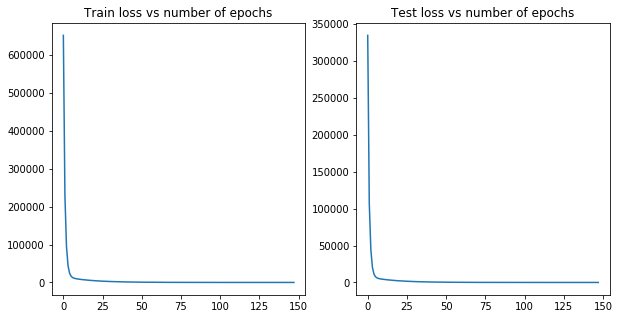

In [19]:
plot = plt.figure(figsize=(10, 5))
train_loss = plot.add_subplot(121)
test_loss = plot.add_subplot(122)

x = np.linspace(-20,20,100)
y = (1/w2)*(-(w1*x)-b)
train_loss.plot(np.arange(loss_train_arr.shape[0]), loss_train_arr)
train_loss.title.set_text('Train loss vs number of epochs')
test_loss.plot(np.arange(loss_test_arr.shape[0]), loss_test_arr)
test_loss.title.set_text('Test loss vs number of epochs')
plt.show()

## Question 6

In [20]:
#TODO_U: Modify names of variables in the next block.

In [21]:
w1, w2, b = random.randint(0, 10), random.randint(0, 10), random.randint(0, 10)
ite_number2 = 0
alpha2 = 0.0006
tot_dLdw1 = 0; tot_dLdw2 = 0; tot_dLdb = 0; tot_loss = 0; tot_loss_test = 0

gradient_all = np.random.randint(500,1000, size=(3))
theta = 50
loss_train_arr = np.array([])
loss_test_arr = np.array([])

while np.linalg.norm(gradient_all)  > theta:

    for i in range(x_train.shape[1]):
        tot_dLdw1 += preprocessed_dLdw1(i)
        tot_dLdw2 += preprocessed_dLdw2(i)
        tot_dLdb += preprocessed_dLdb(i)
        tot_loss += preprocessed_loss(i)
    for j in range(x_test.shape[1]):
        tot_loss_test += preprocessed_loss_test(j)
    loss_train_arr = np.append(loss_train_arr, tot_loss)
    loss_test_arr = np.append(loss_test_arr, tot_loss_test)
    gradient_all = np.array([tot_dLdw1, tot_dLdw2, tot_dLdb])
    w1 = w1 - (alpha2*tot_dLdw1)
    w2 = w2 - (alpha2*tot_dLdw2)
    b = b - (alpha2*tot_dLdb)

    ite_number2 += 1
    tot_dLdw1 = 0; tot_dLdw2 = 0; tot_dLdb = 0; tot_loss = 0; tot_loss_test = 0
    

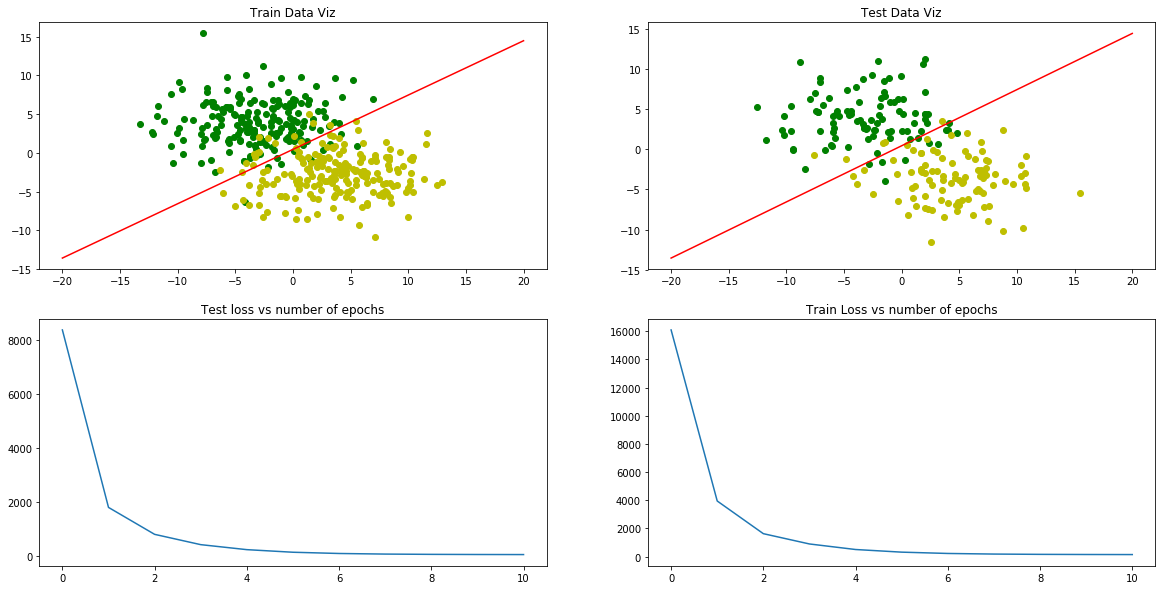

In [25]:
fig = plt.figure(figsize=(20, 10))
train_data = fig.add_subplot(221)
test_data = fig.add_subplot(222)
epoch_train = fig.add_subplot(223)
epoch_test = fig.add_subplot(224)

# test_data.plot(x_test[0,:100], x_test[1,:100], 'go', x_test[0,100:200], x_test[1,100:200], 'yo', x, y, '-r')

x = np.linspace(-20,20,100)
y = (1/w2)*(-(w1*x)-b)
train_data.plot(x_train[0,:200], x_train[1,:200], 'go', x_train[0,200:400], x_train[1,200:400], 'yo', x, y, '-r')
train_data.title.set_text('Train Data Viz')
epoch_train.plot(np.arange(loss_test_arr.shape[0]), loss_test_arr)
epoch_train.title.set_text('Test loss vs number of epochs')
test_data.plot(x_test[0,:100], x_test[1,:100], 'go', x_test[0,100:200], x_test[1,100:200], 'yo', x, y, '-r')
test_data.title.set_text('Test Data Viz')
epoch_test.plot(np.arange(loss_train_arr.shape[0]), loss_train_arr)
epoch_test.title.set_text('Train Loss vs number of epochs')

plt.show()

In [23]:
print("The learning rates before and after are {} and {} and number of iterations is {} and {}".format(alpha1, alpha2, ite_number1, ite_number2))

The learning rates before and after are 4e-05 and 0.0006 and number of iterations is 148 and 11


We see that the number of iterations reduces for preprocessed data.

## Questions
4. TODO
Rest done above.